> R10725012 呂晟維
## Q1 Decision Tree Algorithms (SECOM dataset)
(40%) Decision Tree Algorithms Use Python to solve the problem. The SECOM (Semiconductor Manufacturing) dataset, consists of manufacturing operation data and the semiconductor quality data. It contains 1567 
observations taken from a wafer fabrication production line. Each observation is a vector of 590 sensor measurements plus a label of pass/fail test. Also, there are only 104 fail cases which are labeled as positive (encoded as 1: bad), whereas much larger amount of examples pass the test and are labeled as negative (encoded as -1: good). The dataset can be collected from UCI machine learning repository. 

#### (a) (5%) Construct a data science framework and show the data summary
DataScience Framework

1.   定義要面臨的問題，提出解決方法和目標
2.   收集資料，釐清每個欄位的含意、邏輯關係以及欄位的類型/值域
3.   分析欄位特徵或資料EDA，針對資料進行合適前處理
4.   選用數個符合目標和資料型態的模型進行分析，並使用驗證資料集做模型的效能評估
5.   比較模型間的績效，評比模型適配性，最後提出改善建議


In [ ]:
# ! pip install openpyxl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
df = pd.read_excel('./MDS_Assignment3_SECOM.xlsx',sheet_name='secom',index_col='Unnamed: 0')
df.head(3)

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00


In [3]:
# Label 非常 imb
df['Label'].value_counts()

-1    1463
 1     104
Name: Label, dtype: int64

In [4]:
# 特徵名稱已被隱藏，只能explore數值關係
# Label: 1 or -1
# Time: 日期字串
df.describe()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


#### (b) (5%) What is the problem about the dataset? Any identical column? Any redundant column? Any missing value? How to handle these issues?

- 檢查重複 columns: 有 104 個欄位的值都是 0 or NaN，故刪除

In [5]:
duplicate_col = df.T.duplicated()
print(duplicate_col.value_counts())

# 把重複的 columns 抓出來看
cols = duplicate_col[duplicate_col==True]
df_dup = df[cols.index]
display(df_dup.head(3))
print('sum of duplicate columns: ', df_dup.sum(axis=0).sum())

False    488
True     104
dtype: int64


,Sensor_150,Sensor_180,Sensor_187,Sensor_190,Sensor_192,Sensor_193,Sensor_194,Sensor_195,Sensor_227,Sensor_230,...,Sensor_530,Sensor_531,Sensor_532,Sensor_533,Sensor_534,Sensor_535,Sensor_536,Sensor_537,Sensor_538,Sensor_539
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


sum of duplicate columns:  0.0


In [6]:
# Drop duplicate columns
# 591 - 104 + 1 = 488
# df = df.T.drop_duplicates(keep='first').T # 同義
df.drop(cols.index, axis=1, inplace=True)
print('columns after drop identical column: ', df.shape[1])

columns after drop identical column:  488


- 檢查重複 rows: 無

In [7]:
dup_index = df[df.duplicated()==True]
dup_index.index

Int64Index([], dtype='int64')

- 檢查 missing value: 刪除 > 70% 的欄位

Total missing value rate is 5.39%. (41225 out of 764696)
Sensor_86 has missing rate of 85%
Sensor_158 has missing rate of 91%
Sensor_159 has missing rate of 91%
Sensor_221 has missing rate of 85%
Sensor_293 has missing rate of 91%
Sensor_294 has missing rate of 91%
Sensor_359 has missing rate of 85%
Sensor_493 has missing rate of 85%
columns after drop missing value column:  480


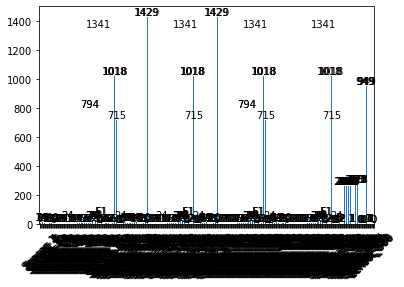

In [8]:
numOfNanCell = df.isnull().sum().sum()
numOfTotalCall = df.shape[0]*df.shape[1]
missRate = numOfNanCell / numOfTotalCall
print(f"Total missing value rate is {100*missRate:.2f}%. ({numOfNanCell} out of {numOfTotalCall})")

missing_vals = df.isnull().sum()
[m//len(df) for m in missing_vals]

# df.isnull().sum().plot(kind='bar')
ax = df.isnull().sum().plot.bar(rot=45)
for container in ax.containers:
    ax.bar_label(container)

missing_vals = df.isnull().sum()
missing_vals = [m*100//len(df) for m in missing_vals]
col_to_drop = []
for i,v in enumerate(missing_vals):
    if v >= 70:
        col_to_drop.append(df.columns[i])
        print(df.columns[i], f"has missing rate of {v}%")
df.drop(col_to_drop, axis=1, inplace=True)
print('columns after drop missing value column: ', df.shape[1])

- Split dataset into train/test set (丟掉Time欄位)

In [9]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-2]
y = df.iloc[:,-2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

X_train shape:  (1253, 478)
X_test shape:  (314, 478)
-1    1172
 1      81
Name: Label, dtype: int64
-1    291
 1     23
Name: Label, dtype: int64


- Impute missing value with mean

In [10]:
# impute with mean
import numpy as np
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values = np.nan, strategy='mean')
X_train = imp_mean.fit_transform(X_train)
X_test = imp_mean.transform(X_test)

#### (c) (5%) After data preprocessing, based on the prepared dataset, use the classification and regression tree (CART) to analyze the prepared dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

see: https://scikit-learn.org/stable/modules/tree.html   
and https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  
選擇調整的參數有
- criterion {“gini”, “entropy”, “log_loss”}, default=”gini”
- max_depth int, default=None
- min_samples_leaf int or float, default=1

In [10]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [11]:
# 可調調整參數名稱
tree.DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [18]:
depth = (np.arange(20)+1) # 無限制下試跑為深度25
parameters = {
    'criterion': ['gini','entropy'], 
    'max_depth': (np.arange(20)+1),
    # 'min_samples_leaf': (np.arange(3)+1)
}
score = ['f1','accuracy']

clf = tree.DecisionTreeClassifier()
clf = GridSearchCV(clf, parameters, 
                    scoring=score,
                    refit='f1', # Refit an estimator using the best found parameters on the whole dataset.
                    return_train_score=True, 
                    cv=10) # 10-fold cross validation
clf.fit(X_train, y_train)
print('best params: ',clf.best_params_)
print('best score: ',clf.best_score_)


best params:  {'criterion': 'gini', 'max_depth': 17}
best score:  0.13222209936606222


In [102]:
import pickle
# with open('q1_clf.pkl', 'wb') as outp:
#     pickle.dump(clf, outp, pickle.HIGHEST_PROTOCOL)
# with open('q1_clf.pkl', 'rb') as inp:
#     clf = pickle.load(inp)

In [20]:
clf.cv_results_.get('split0_test_f1').shape

(40,)

In [21]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'params', 'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'split5_test_f1', 'split6_test_f1', 'split7_test_f1', 'split8_test_f1', 'split9_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1', 'split0_train_f1', 'split1_train_f1', 'split2_train_f1', 'split3_train_f1', 'split4_train_f1', 'split5_train_f1', 'split6_train_f1', 'split7_train_f1', 'split8_train_f1', 'split9_train_f1', 'mean_train_f1', 'std_train_f1', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'split9_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'split2_train_accuracy', 'split3_train_accuracy', 'split4_train_ac

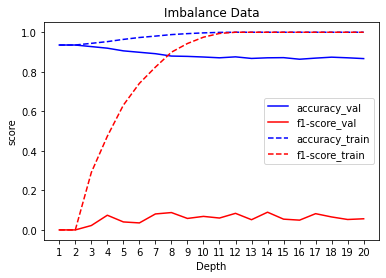

In [33]:
f1_result = []; acc_result = []
f1_train = []; acc_train = []

for i in range(10):
    # 選用best param = entropy，所以取後面20個(前20個是gini)
    f1 = clf.cv_results_.get('split{}_test_f1'.format(i))[-20:]
    acc = clf.cv_results_.get('split{}_test_accuracy'.format(i))[-20:]
    f1_tr = clf.cv_results_.get('split{}_train_f1'.format(i))[-20:]
    acc_tr = clf.cv_results_.get('split{}_train_accuracy'.format(i))[-20:]
    f1_result.append(f1)
    acc_result.append(acc)
    f1_train.append(f1_tr)
    acc_train.append(acc_tr)

f1_result_df = pd.DataFrame(f1_result)
acc_result_df = pd.DataFrame(acc_result)
f1_train_df = pd.DataFrame(f1_train)
acc_train_df = pd.DataFrame(acc_train)

# plot relation between depth and accuracy/f1-score
plt.title('Imbalance Data')
plt.plot(depth, acc_result_df.sum(axis=0)/10, color='blue')
plt.plot(depth, f1_result_df.sum(axis=0)/10, color='red')
plt.plot(depth, acc_train_df.sum(axis=0)/10, color='blue', linestyle='dashed')
plt.plot(depth, f1_train_df.sum(axis=0)/10, color='red', linestyle='dashed')
plt.xlabel('Depth')
plt.ylabel('score')
plt.xticks(depth)
plt.legend(['accuracy_val','f1-score_val','accuracy_train','f1-score_train'])
plt.show()

In [89]:
# train report
from sklearn.metrics import classification_report
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00      1172
           1       1.00      0.88      0.93        81

    accuracy                           0.99      1253
   macro avg       1.00      0.94      0.96      1253
weighted avg       0.99      0.99      0.99      1253



In [37]:
# test report: very poor on minor class '1'
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.93      0.92      0.93       291
           1       0.15      0.17      0.16        23

    accuracy                           0.87       314
   macro avg       0.54      0.55      0.55       314
weighted avg       0.88      0.87      0.87       314



AUC area is 0.9382716049382716


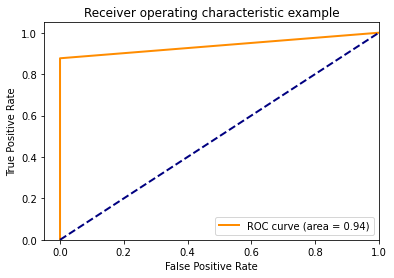

In [91]:
# ROC & AUC on train
# TP rate 一開始表現的超好
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred, pos_label=1)
auc_area = auc(fpr, tpr)
print(f'AUC area is {auc_area}')

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % auc_area,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

AUC area is 0.549155834453907


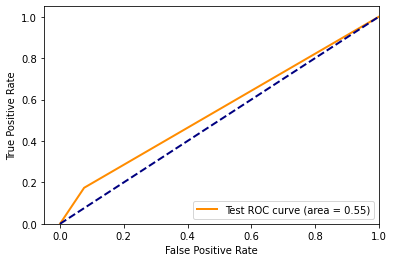

In [103]:
# ROC & AUC on train
# TP rate 一開始表現的超好
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
from sklearn.metrics import roc_curve, auc
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc_area = auc(fpr, tpr)
print(f'AUC area is {auc_area}')

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="Test ROC curve (area = %0.2f)" % auc_area,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

#### (d) (5%) Suggest a method to address the data imbalance issue. Build a new balanced dataset. (hint: undersampling or oversampling)

Ans: 
- 由於 minor class '1' 樣本太少，train 81, test 23，特徵數卻有上百個，資料比數明顯不足，我們採用 oversampling 的方法來製作新資料，以解決 imb。
- 因為總樣本數也不多，因此不針對 major class 採用 undersampling。
- ref: https://imbalanced-learn.org/stable/over_sampling.html

In [ ]:
# ! pip install -U imbalanced-learn

In [19]:
# 讓'1'從81變586，'-1'維持1172
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
desired_ratio = 0.5 # 少數/多數
X_resampled, y_resampled = SMOTE(sampling_strategy=desired_ratio).fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(-1, 1172), (1, 586)]


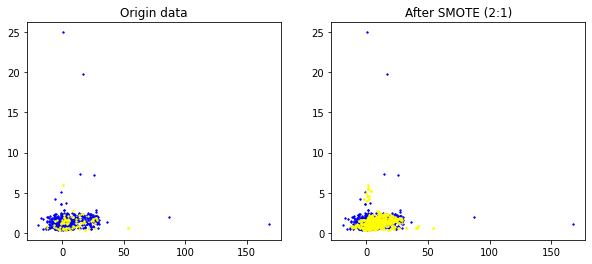

In [109]:
# 看一下這取樣前後 兩個 features 的分布 (X59, X350在決策樹的最上層，應是重要變數)
fe1, fe2 = 59, 350 
labels_set = set(y_train)
def get_index(lst):
    indices_of_1 = [i for i, x in enumerate(lst) if x == 1] # 標籤為1的index
    indices_of_m = [i for i, x in enumerate(lst) if x == -1] # -1
    return indices_of_1, indices_of_m

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.set_title('Origin data')
for lab in labels_set:
    idx1, idxm = get_index(y_train)
    ax.scatter(X_train[idxm,fe1], X_train[idxm,fe2], color='blue',s=1)
    ax.scatter(X_train[idx1,fe1], X_train[idx1,fe2], color='yellow',s=2)

ax = fig.add_subplot(1,2,2)
ax.set_title('After SMOTE (2:1)')
for lab in labels_set:
    idx1, idxm = get_index(y_resampled)
    ax.scatter(X_resampled[idxm,fe1], X_resampled[idxm,fe2], color='blue',s=1)
    ax.scatter(X_resampled[idx1,fe1], X_resampled[idx1,fe2], color='yellow',s=2)

#### (e) (5%) Based on the balanced dataset, use the classification and regression tree (CART) to analyze the balanced dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

Ans: 最佳模型的評估指標改變成了entropy，max_depth變淺，看得出因為imb label集中起來讓模型較不那麼複雜了。模型績效表現並沒有比較好，可說是持平or些微下降。詳見下列steps。

In [92]:
depth = (np.arange(20)+1) # 無限制下試跑為深度25
parameters = {
    'criterion': ['gini','entropy'], 
    'max_depth': (np.arange(20)+1),
    # 'min_samples_leaf': (np.arange(3)+1)
}
score = ['f1','accuracy']

clf = tree.DecisionTreeClassifier()
clf = GridSearchCV(clf, parameters, 
                    scoring=score,
                    refit='f1', # Refit an estimator using the best found parameters on the whole dataset.
                    return_train_score=True, 
                    cv=10) # 10-fold cross validation
clf.fit(X_resampled, y_resampled)
print('best params: ',clf.best_params_)
print('best score: ',clf.best_score_)


best params:  {'criterion': 'entropy', 'max_depth': 12}
best score:  0.8065642257779111


In [98]:
# save model
import pickle
with open('q1_resample.pkl', 'wb') as outp:
    pickle.dump(clf, outp, pickle.HIGHEST_PROTOCOL)
# with open('q1_clf.pkl', 'rb') as inp:
#     clf = pickle.load(inp)

In [93]:
# train 簡直完美 ???
y_pred = clf.predict(X_resampled)
print(classification_report(y_resampled, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1172
           1       1.00      0.99      1.00       586

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



In [94]:
# test report: very poor on minor class '1' 只有進步一點點，可判斷是overfiting
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.93      0.86      0.89       291
           1       0.11      0.22      0.14        23

    accuracy                           0.81       314
   macro avg       0.52      0.54      0.52       314
weighted avg       0.87      0.81      0.84       314



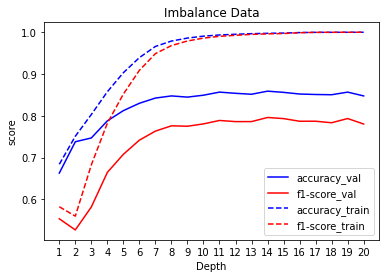

In [95]:
# 直接看 test 的績效，train 很完美就不看了 (ps: (c)的這張圖是train的)
f1_result = []; acc_result = []
f1_train = []; acc_train = []

for i in range(10):
    # 選用best param = entropy，所以取後面20個(前20個是gini)
    f1 = clf.cv_results_.get('split{}_test_f1'.format(i))[:20]
    acc = clf.cv_results_.get('split{}_test_accuracy'.format(i))[:20]
    f1_tr = clf.cv_results_.get('split{}_train_f1'.format(i))[:20]
    acc_tr = clf.cv_results_.get('split{}_train_accuracy'.format(i))[:20]
    f1_result.append(f1)
    acc_result.append(acc)
    f1_train.append(f1_tr)
    acc_train.append(acc_tr)

f1_result_df = pd.DataFrame(f1_result)
acc_result_df = pd.DataFrame(acc_result)
f1_train_df = pd.DataFrame(f1_train)
acc_train_df = pd.DataFrame(acc_train)

# plot relation between depth and accuracy/f1-score
plt.title('Resample Data (test set)')
plt.plot(depth, acc_result_df.sum(axis=0)/10, color='blue')
plt.plot(depth, f1_result_df.sum(axis=0)/10, color='red')
plt.plot(depth, acc_train_df.sum(axis=0)/10, color='blue', linestyle='dashed')
plt.plot(depth, f1_train_df.sum(axis=0)/10, color='red', linestyle='dashed')
plt.xlabel('Depth')
plt.ylabel('score')
plt.xticks(depth)
plt.legend(['accuracy_val','f1-score_val','accuracy_train','f1-score_train'])
plt.show()

AUC area is 1.0


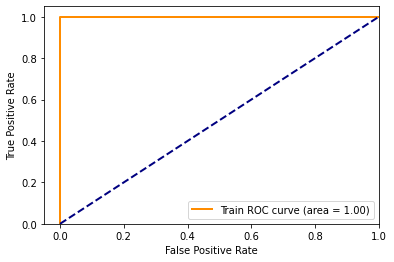

In [100]:
# ROC & AUC on train
# TP rate 一開始表現的超好
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
from sklearn.metrics import roc_curve, auc
y_pred = clf.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_pred, pos_label=1)
auc_area = auc(fpr, tpr)
print(f'AUC area is {auc_area}')

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="Train ROC curve (area = %0.2f)" % auc_area,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

AUC area is 0.5382489167787241


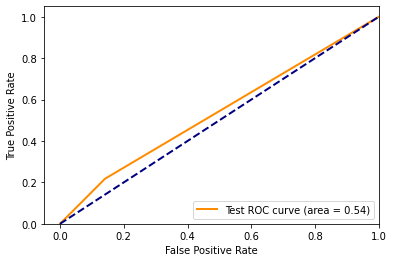

In [99]:
# ROC & AUC on test
# TP rate 一開始表現的超好
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
from sklearn.metrics import roc_curve, auc
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc_area = auc(fpr, tpr)
print(f'AUC area is {auc_area}')

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="Test ROC curve (area = %0.2f)" % auc_area,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

#### (f) (5%) Give a comparison between (c) and (e). Any suggestion or insight?

經由 SMOTE 來增加少數樣本後，雖然 train 的 AUC 是 1.0 完美，但測試集表現十分慘烈，如下:
- Oringinal test data AUC area is 0.5491
- Resampled test data AUC area is 0.5382

我的看法是，(D)小題散佈圖可看出其實兩種LABEL的在特徵空間上的重疊性高，或許需要蒐集更多資料再對major類別做undersampling，更有意義。而非對minor類別做擴增。

[Text(0.6049592391304348, 0.9722222222222222, 'X[59] <= 8.145\ngini = 0.121\nsamples = 1253\nvalue = [1172, 81]'),
 Text(0.3376358695652174, 0.9166666666666666, 'X[350] <= 0.394\ngini = 0.083\nsamples = 1057\nvalue = [1011, 46]'),
 Text(0.24728260869565216, 0.8611111111111112, 'X[215] <= 0.017\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.22554347826086957, 0.8055555555555556, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26902173913043476, 0.8055555555555556, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

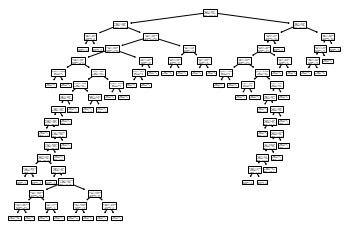

In [108]:
# list 重要變數: X[59], X[350], X[215]
tree.plot_tree(clf.best_estimator_)[:5]

#### (g) (5%) Use “Random Forest” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight.

Ans: 由於 Random Forest 集合了多個不同採樣的弱學習器Tree，是variance較低的模型，因此表現較差。結果為:
- Original data: 全部猜多數類別 -1，AUC = 0.5 無鑑別度。
- Resampled data: 好一些些，一開始TPrate有拉上來，AUC = 0.5217。

In [24]:
def plotRoc(clf, X, y):
    from sklearn.metrics import roc_curve, auc
    y_pred = clf.predict(X)
    fpr, tpr, thresholds = roc_curve(y, y_pred, pos_label=1)
    auc_area = auc(fpr, tpr)
    print(f'AUC area is {auc_area}')

    plt.figure(figsize=(6,4))
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % auc_area,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

predict values count: Counter({-1: 314})
AUC area is 0.5


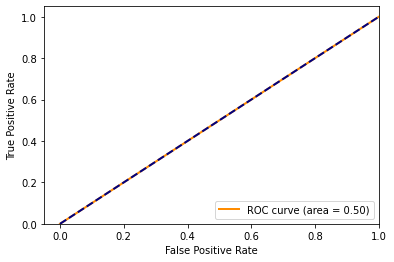

In [17]:
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('predict values count:', Counter(y_pred))
plotRoc(clf, X_test, y_test)

AUC area is 0.5217391304347826


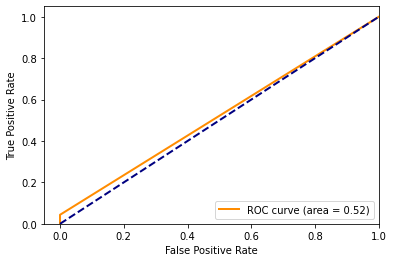

In [25]:
# SMOTE data
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X_resampled, y_resampled)
y_pred = clf.predict(X_test)
plotRoc(clf, X_test, y_test)

#### (h) (5%) Use “Gradient Boosting Decision Tree (GBDT)” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight.

Boosting 是降低bias的誤差、放棄variance的方法，我推測對於imb data的應用性會比RF還要好。結果也應證我的猜測是正確的。

經過人工調參，發現原始資料集在testing data的表現上竟然比SMOTE資料集還要好，AUC是0.58>0.56，顯示SMOTE其實對這個資料集並沒有幫助。應如我所說的，收集更多真實資料更有意義。

model score: 0.8598726114649682
AUC area is 0.584043030031376


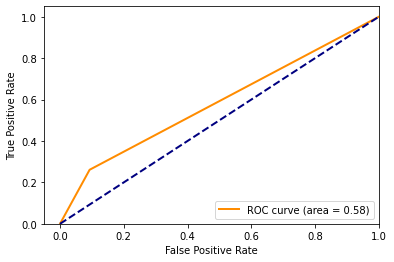

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=2.0,
    max_depth=5, random_state=0).fit(X_train, y_train)
print('model score:', clf.score(X_test, y_test))
plotRoc(clf, X_test, y_test)

model score: 0.9994311717861206
AUC area is 0.5605856865381743


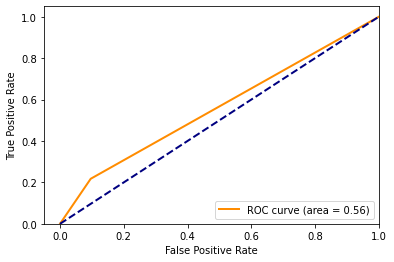

In [36]:
# SMOTE data
clf = GradientBoostingClassifier(n_estimators=10, learning_rate=2.0,
    max_depth=10, random_state=0).fit(X_resampled, y_resampled)
print('model score:', clf.score(X_resampled, y_resampled))
plotRoc(clf, X_test, y_test)

## Q2 (40%) Feature Selection (flotation plant)

#### (a) 試使用線性迴歸以最小平方法估計迴歸係數，並說明重要變數(例如排序p-value或t統計量)。

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from collections import Counter
# import statsmodels.stats.api as sms
# import scipy.stats as stats

In [2]:
# import Flotation_Plant data, x = x1~x22 不含日期和鐵礦百分比, y = % Silica Concentrate
data = pd.read_csv("./MiningProcess_Flotation_Plant_Database.csv")
data = data.replace(",", ".", regex=True) 
display(data.head(3))
print('data.shape:', data.shape)

data_X = data.iloc[:, 1:-2].astype(float) # params
data_y = data.iloc[:, -1].astype(float) # label
data_X_const = sm.add_constant(data_X) # 做線性回歸前 要手動加上截距(常數項)
data_X_const = data_X_const.rename(columns={"const": "Intercept"})

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31


data.shape: (737453, 24)


In [11]:
# (1) 整體資料先做線性迴歸；
# (2) 依 p value 小至大排序選出重要變數；
model = sm.OLS(data_y, data_X)
osl_result = model.fit()
# print(furnace_result.summary())
print('rsquared:', osl_result.rsquared, '\nrsquared_adj:', osl_result.rsquared_adj)

osl_pvalues = osl_result.pvalues
print('\nTop 3 features:\n', osl_pvalues.sort_values().head(3)) # p 越小影響力越大
print('\nLast 3 features:\n', osl_pvalues.sort_values().tail(3)) # p 越大影響力越小

osl_imp_feat = list(osl_pvalues.sort_values().keys())
print(f"\nosl important features (sorted): {osl_imp_feat}")

rsquared: 0.8393006644640826 
rsquared_adj: 0.8392960881966488

Top 3 features:
 Flotation Column 04 Air Flow    0.0
Flotation Column 05 Level       0.0
Amina Flow                      0.0
dtype: float64

Last 3 features:
 Flotation Column 02 Level       0.003302
% Iron Feed                     0.042210
Flotation Column 07 Air Flow    0.072331
dtype: float64

osl important features (sorted): ['Flotation Column 04 Air Flow', 'Flotation Column 05 Level', 'Amina Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 'Flotation Column 06 Air Flow', 'Starch Flow', 'Flotation Column 03 Air Flow', 'Ore Pulp Flow', 'Flotation Column 07 Level', 'Flotation Column 04 Level', '% Silica Feed', 'Flotation Column 03 Level', 'Flotation Column 02 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Level', 'Flotation Column 02 Level', '% Iron Feed', 'Flotation Column 07 Air Flow']


- 可以看到選了top3的特徵為: `'Flotation Column 04 Air Flow', 'Flotation Column 05 Level', 'Amina Flow'`。
- 若選擇 p < 0.01 的特徵，則會選取以下19個。

In [17]:
selected_attr = []
for index in osl_pvalues.sort_values().index:
  if osl_pvalues[index] < 0.01:
    selected_attr.append(index)
print("Selected:", len(selected_attr),'\n', selected_attr)

Selected: 19 
 ['Flotation Column 04 Air Flow', 'Flotation Column 05 Level', 'Amina Flow', 'Ore Pulp pH', 'Ore Pulp Density', 'Flotation Column 01 Air Flow', 'Flotation Column 06 Air Flow', 'Starch Flow', 'Flotation Column 03 Air Flow', 'Ore Pulp Flow', 'Flotation Column 07 Level', 'Flotation Column 04 Level', '% Silica Feed', 'Flotation Column 03 Level', 'Flotation Column 02 Air Flow', 'Flotation Column 01 Level', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Level', 'Flotation Column 02 Level']


#### (b) 試使用逐步迴歸找出重要變數。

Ref: https://github.com/AakkashVijayakumar/stepwise-regression

每次都對未被挑選的特徵做OLS，再挑選一個變數作為重要變數，由結果可看出前13個特徵的p-value都是0，次序就不這麼重要了，由於我們threshold_in設為0.1，就只選到`% Iron Feed`便停止挑選。

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

def forward_regression(X, y, threshold_in=0.01, verbose=True) -> list:
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

selected_Feature = forward_regression(data_X, data_y)

Add  Amina Flow                     with p-value 0.0
Add  Flotation Column 02 Air Flow   with p-value 0.0
Add  Starch Flow                    with p-value 0.0
Add  % Silica Feed                  with p-value 0.0
Add  Flotation Column 07 Air Flow   with p-value 0.0
Add  Flotation Column 04 Air Flow   with p-value 0.0
Add  Flotation Column 01 Air Flow   with p-value 0.0
Add  Flotation Column 03 Air Flow   with p-value 0.0
Add  Ore Pulp Flow                  with p-value 0.0
Add  Flotation Column 05 Level      with p-value 0.0
Add  Ore Pulp Density               with p-value 0.0
Add  Flotation Column 06 Air Flow   with p-value 0.0
Add  Ore Pulp pH                    with p-value 0.0
Add  Flotation Column 07 Level      with p-value 6.30878e-97
Add  Flotation Column 05 Air Flow   with p-value 6.05088e-71
Add  Flotation Column 04 Level      with p-value 1.84252e-54
Add  Flotation Column 03 Level      with p-value 1.78665e-14
Add  Flotation Column 01 Level      with p-value 4.83258e-50
Add  F

#### (c) 試比較(a)與(b)的結果是否一致？有何不同？

完全一致。因為我們的 threshold 都設為 0.01，最終結果相同。stepwise可以看到挑選的過程，若覺得21個特徵太多，則可以由結果看出應該先刪除哪些較不重要的變數。

In [22]:
one_imp = set(osl_imp_feat)
step_imp = set(selected_Feature)
print(one_imp - step_imp)
print(step_imp - one_imp)
len(one_imp)

set()
set()


21


#### (d) 試使用脊迴歸挑選重要變數。
- ref: https://scikit-learn.org/stable/modules/linear_model.html
- ref: https://medium.com/@sabarirajan.kumarappan/feature-selection-by-lasso-and-ridge-regression-python-code-examples-1e8ab451b94b

這邊使用 sklearn 的 Redge 來挑選變數，使用平方法作為限制式，因此可行解區域是個圓形，可行解區域的threshold預設為1，結果顯示我們挑選到了 `'Ore Pulp pH', 'Ore Pulp Density'` 兩個特徵。

In [3]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [4]:
selector = SelectFromModel(Ridge())
selector.fit(data_X, data_y)
selected_features = selector.get_support()
print("coef:", selector.estimator_.coef_)

selected_features = data_X.columns[selected_features]
print("Selected Feature:",len(selected_features),', they are:', selected_features)


coef: [-2.72420159e-03  7.82534426e-03 -3.84501633e-05  3.22903839e-03
 -4.64310174e-03 -3.25921166e-01 -1.93320934e+00 -8.86014909e-03
  1.07132288e-03 -5.49579507e-03  3.53149002e-02 -6.53003035e-03
  2.79867799e-03  9.54649812e-05 -1.93287915e-04 -4.86930183e-05
  1.88604737e-04 -2.99714214e-04 -1.17096731e-03  7.49541598e-05
 -3.43875846e-04]
Selected Feature: 2 , they are: Index(['Ore Pulp pH', 'Ore Pulp Density'], dtype='object')


(56.23413251903491,
 17782794.100389227,
 -1.924067446061959,
 0.13163771935677648)

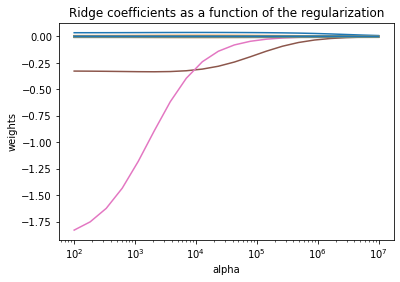

In [13]:
n_alphas = 20
alphas = np.logspace(2, 7, n_alphas)
coefs = []
clf = Ridge()

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(data_X, data_y)
    coefs.append(clf.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

#### (e) 試使用套索迴歸或適應性套索迴歸挑選重要變數。

這邊使用 sklearn 的 Lasso 來挑選變數，使用絕對值法作為限制式(L1 regularization)，因此可行解區域是個矩形，可行解區域的threshold預設為1，結果顯示我們挑選到了 `'Starch Flow', 'Amina Flow', 'Flotation Column 01 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 03 Level', 'Flotation Column 04 Level',
       'Flotation Column 05 Level', 'Flotation Column 07 Level'` 9個特徵。意思是這9個特徵在alpha=threshold前被壓縮至0。

In [6]:
selector = SelectFromModel(Lasso())
selector.fit(data_X, data_y)
selected_features = selector.get_support()
print("coef:", selector.estimator_.coef_)

selected_features = data_X.columns[selected_features]
print("Selected Feature:",len(selected_features),', they are:' , selected_features)

coef: [-0.00000000e+00  0.00000000e+00 -6.85383038e-05  1.93270785e-03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -6.96096749e-03
 -0.00000000e+00 -1.66382483e-03  0.00000000e+00 -0.00000000e+00
  1.03975158e-03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.71856604e-05 -4.20905107e-04 -1.24211064e-03 -0.00000000e+00
 -5.03653401e-04]
Selected Feature: 9 , they are: Index(['Starch Flow', 'Amina Flow', 'Flotation Column 01 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 03 Level', 'Flotation Column 04 Level',
       'Flotation Column 05 Level', 'Flotation Column 07 Level'],
      dtype='object')


(0.0007498942093324559,
 0.4216965034285822,
 -1.5996347788907608,
 0.11576907951577939)

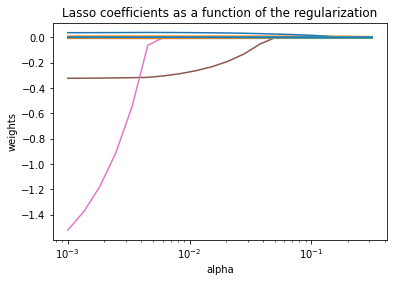

In [16]:
n_alphas = 20
alphas = np.logspace(-3, -0.5, n_alphas)
coefs = []
clf = Lasso()

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(data_X, data_y)
    coefs.append(clf.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")

#### (f) 試比較(d)與(e)的結果是否一致？有何不同？

可以看出 Lasso 選出的特徵明顯比 Rigid 多，因為 Lasso 的可行解區域是線性組合，較容易與資料的值域切在坐標軸為0的座標點。

我們也發現兩個方法選出的特徵都不一樣，由兩張不同 alpha 的壓縮圖，可看出兩個方法都劃出兩個特徵一開始就被明顯的壓縮，在 Rigid 中是 `'Ore Pulp pH', 'Ore Pulp Density'`，在 Lasso 中是 `'Starch Flow', 'Amina Flow'`，或許可以認定這4個特徵是最重要的變數。

#### (g) 在特徵中那些特徵彼此之間高相關？若以線性迴歸預測，請問是否有共線性的問題？

- ref: https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b

From the heatmap, we can identify strong relationships between:
- % Silica Feed, % Iron Feed (-0.97)
- Amina Flow, Ore Pulp Density (0.66)
- Flotation Column 1 Air Flow, Flotation Column 3 Air Flow (0.95)
- Flotation Column 2 Air Flow, Flotation Column 6 Air Flow (0.66)
- Flotation Column 1 Level, Flotation Column 3 Level (0.73)

若以相關係數來看，`% Silica Feed, % Iron Feed (-0.97)` 以及 `Flotation Column 1 Air Flow, Flotation Column 3 Air Flow (0.95)` 這兩組資料相關性非常高，而 0.95 這組 Air flow 可能存在共線性，建議再以 VIF 指標檢視。

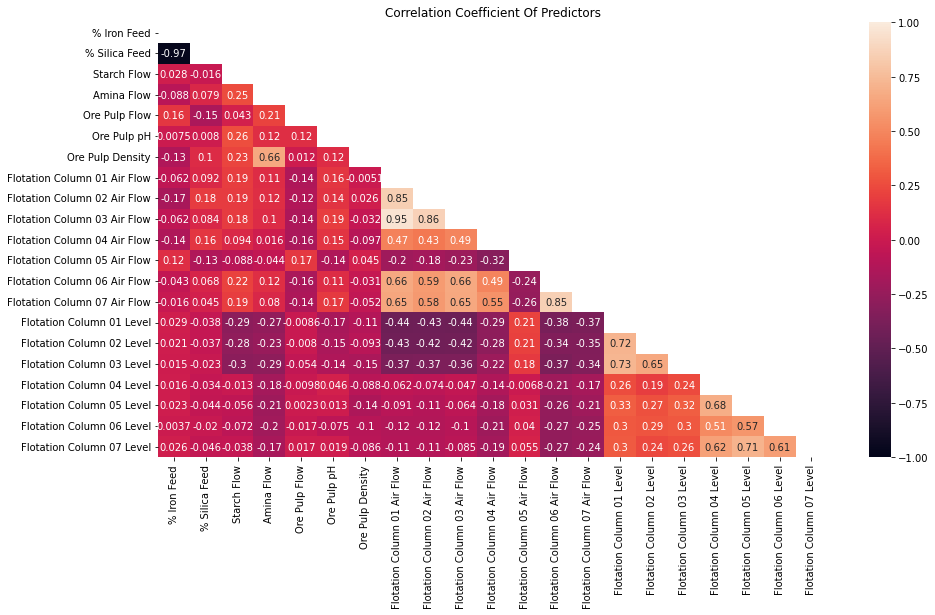

In [30]:
# set figure size (in inch)
plt.figure(figsize=(15,8))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(data_X.corr(), dtype=bool))

import seaborn as sns
sns.heatmap(data_X.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()


#### (h) 是否可用含鐵濃度百分比來建模預測含二氧化矽濃度百分比？為什麼？可能有什麼潛在問題？如何解決？

若只納入輸入鐵礦中的礦物種類含量(% Iron Feed, % Silica Feed)，來預測精製後的石英含量(% Silica Concentrate)，是非常有用的，因為兩個 feed 存在高度負相關。

在邏輯上，我們是無法再選用精製後的鐵礦含量(% Iron Concentrate)來預測精製後的石英含量(% Silica Concentrate)，因為兩者皆是精製後的測量指標，需要經過一小時的專業分析才能測量出其指標，這時浮選場內的礦物 Feed 和工廠參數 Flow level, Air flow 已經改變。

若想以% Iron Concentrate加入時間序列分析中，頂多取得當下專業分析的報表數字，也就是針對一小時前資料的分析，作為當下時間點的特徵。

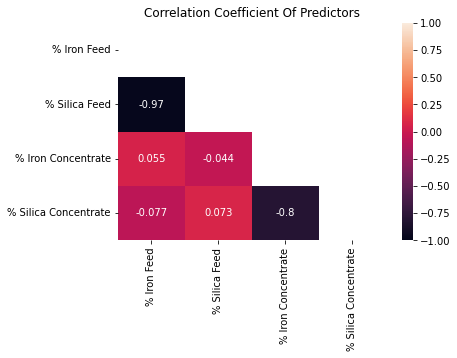

In [32]:
iron_and_silica = data.iloc[:, [1,2,-2,-1]].astype(float)

mask = np.triu(np.ones_like(iron_and_silica.corr(), dtype=bool))

sns.heatmap(iron_and_silica.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [34]:
iron_and_silica.columns

Index(['% Iron Feed', '% Silica Feed', '% Iron Concentrate',
       '% Silica Concentrate'],
      dtype='object')

## Q3. (20%) Deep Learning - handwritten digit recognition

It is available in text form and contains 1593 handwritten digits from 80 persons. The images are 16 × 16 pixels square box and in black and white format. (teacher took 15 samples for validation and you only see 1578 samples)

### 3-(a) (15%) 
For BPN (or CNN if you prefer), try to investigate the effects of changing “PARAMETERS” such as learning rates, momentum, # of hidden/convolutional layers, dropout rate, etc. Show the numerical results and “DIAGRAM” from different perspectives (e.g., MSE/accuracy, F1 score, convergence time, error of training data, error of testing data, etc.). Please show all your work in detail, in particular, you “MAY” need to design your experiments with different parameters systematically.

Ans: 我的訓練結果如下
1. 一開始調整 lr 和 decay並觀察loss，當模型loss能穩定下降便固定此組param。
    - lr: 0.01, weight_decay: 1e-3, batch_size = 15。
2. 原先將 Kernal 數設為 1，沒想到digit 5沒有被預測出來，才發現是Kernal數不足。
    - Saving model (epoch =   98, train loss = 1.7298, dev loss = 1.7056, train acc = 0.74)
3. 當我將 Kernel 數調整為 5，模型便能學辨識到每種，只是digit 7的FP rate較高，會將1 3當成7來預測。
    - Saving model (epoch =   66, train loss = 1.6112, dev loss = 1.5918, train acc = 0.85)
4. 統一把 Kernel size 調整為 3，成效又更好了。
    - Saving model (epoch =   35, train loss = 1.5855, dev loss = 1.5847, train acc = 0.88)
5. batch_size 調降為5，發現loss降但acc也降，開始overfit，停止訓練。

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# Imports
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary

# For data preprocess
import pandas as pd
import numpy as np
import csv
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from collections import Counter

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

myseed = 2077  # set a random seed for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(myseed)
torch.manual_seed(myseed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(myseed)

In [ ]:
def get_device():
    ''' Get device (if GPU is available, use GPU) '''
    return 'cuda' if torch.cuda.is_available() else 'cpu'

def plot_learning_curve(loss_record, title=''):
    ''' Plot learning curve of your DNN (train & dev loss) '''
    total_steps = len(loss_record['train'])
    x_1 = range(total_steps)
    x_2 = x_1[::len(loss_record['train']) // len(loss_record['dev'])]
    figure(figsize=(6, 4))
    plt.plot(x_1, loss_record['train'], c='tab:red', label='train')
    plt.plot(x_2, loss_record['dev'], c='tab:cyan', label='dev')
    plt.ylim(0., 3.)
    plt.xlabel('Training steps')
    plt.ylabel('Cross entropy loss')
    plt.title('Learning curve of {}'.format(title))
    plt.legend()
    plt.show()


def plot_pred(input_set, model, device):
    ''' Plot prediction of your DNN 
    https://stackoverflow.com/questions/33379261/how-can-i-have-a-bar-next-to-python-seaborn-heatmap-which-shows-the-summation-of '''
    # see the result of training set
    preds, labels = test(input_set, model, device, with_label=True)
    cf_matrix = confusion_matrix(labels, preds)
    # print(cf_matrix)
    fig = plt.figure(figsize=(6,6))
    ax1 = plt.subplot2grid((10,10), (0,0), colspan=9, rowspan=9)
    ax2 = plt.subplot2grid((10,10), (9,0), colspan=9, rowspan=1)
    ax3 = plt.subplot2grid((10,10), (0,9), colspan=1, rowspan=9)

    sns.heatmap(cf_matrix, ax=ax1, annot=True, fmt='g',  cmap="YlGnBu", linecolor='b', cbar = False)

    ax1.set(ylabel="True label")
    ax1.xaxis.tick_top()
    sns.heatmap((pd.DataFrame(cf_matrix.sum(axis=0))).transpose(), ax=ax2,  annot=True, fmt='g', cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False)
    sns.heatmap(pd.DataFrame(cf_matrix.sum(axis=1)), ax=ax3,  annot=True, fmt='g', cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False)
    ax2.set(xlabel="Prediction")
    

### Data load & prepare

X_train shape: (1341, 1, 16, 16)
y_train shape: (1341, 10)
X_dev   shape: (237, 1, 16, 16)
y_dev   shape: (237, 10)
X_pred shape: (15, 1, 16, 16)


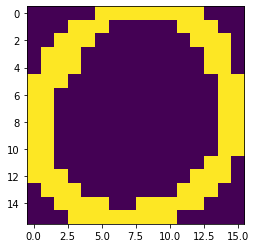

In [ ]:
# Data load & prepare
path = "./MDS_Assignment3_DRtraining.xlsx"
df_train = pd.read_excel(path, sheet_name="training", index_col=0)
path = "./MDS_Assignment3_DRpredict.xlsx"
df_pred = pd.read_excel(path, sheet_name="Predict", index_col=0)

X_train = df_train.iloc[:,0:256].values
y_train = df_train.iloc[:,256:].values
X_train = X_train.reshape(-1, 1, 16, 16) # channel是1

# train valid split
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.15, random_state=2042)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_dev   shape:", X_dev.shape)
print("y_dev   shape:", y_dev.shape)

X_pred = df_pred.iloc[:,0:256].values
X_pred = X_pred.reshape(-1, 1, 16, 16)
print("X_pred shape:", X_pred.shape)

plt.imshow(X_train[1].reshape(16,16))

class CnnDataset(Dataset):
    ''' Dataset for our pre-processed dataset '''
    def __init__(self, data, target=None, mode='train'):
        self.mode = mode

        # Read data
        assert(mode in ['train','dev','test'])
        if mode == 'train':
            self.data = data
            self.target = target
            assert(len(self.data) == len(self.target))
        elif mode == 'dev':
            self.data = data
            self.target = target
            assert(len(self.data) == len(self.target))
        else:
            self.data = data
        
        # Get the length, dimansion of dataset
        self.dim = self.data.shape[1:]
        print('Finished reading the {} set of CNN Dataset ({} samples found, input dim = {})'
              .format(mode, len(self.data), self.dim))

    def __len__(self):
        # Returns the size of the dataset
        return len(self.data)

    def __getitem__(self, index):
        # Returns one sample for the index at a time
        if self.mode in ['train', 'dev']: # For training
            return torch.FloatTensor(self.data[index]), torch.FloatTensor(self.target[index])
        else:                             # For testing (no target)
            return torch.FloatTensor(self.data[index])

def dataloader(mode, data, target, batch_size=15, n_jobs=0):
    ''' Generates a dataset, then is put into a dataloader. '''
    dataset = CnnDataset(data, target, mode)  # Construct dataset
    return DataLoader(
        dataset, batch_size,
        shuffle=(mode == 'train'), drop_last=False,
        num_workers=n_jobs, pin_memory=True)                            # Construct dataloader

In [ ]:
# load test
tr_set = dataloader('train', X_train, y_train)
dv_set = dataloader('dev',   X_dev, y_dev )
tt_set = dataloader('test',  X_pred, None )

Finished reading the train set of CNN Dataset (1341 samples found, input dim = (1, 16, 16))
Finished reading the dev set of CNN Dataset (237 samples found, input dim = (1, 16, 16))
Finished reading the test set of CNN Dataset (15 samples found, input dim = (1, 16, 16))


In [ ]:
# build model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # The arguments for commonly used modules:
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        # torch.nn.MaxPool2d(kernel_size, stride, padding)
        # torch.nn.BatchNorm2d(num_features): C from an expected input of size (N, C, H, W)
        # output shape = ((W-F+2*P )/S)+1

        # input image size: [1, 16, 16] for [channels, width, height]
        # output label: 10 kinds of digit
        self.numOfKernal = 5
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(1, self.numOfKernal, kernel_size=3, stride=1, padding=0), # [1, 14, 14]
            nn.BatchNorm2d(self.numOfKernal),
            nn.ReLU(),
            # nn.MaxPool2d(2, 2, 1),      # [none]

            nn.Conv2d(self.numOfKernal, self.numOfKernal, kernel_size=3, stride=1, padding=0), # [1, 12, 12]
            nn.BatchNorm2d(self.numOfKernal),
            nn.ReLU(),
            # nn.MaxPool2d(2, 2, 0),      # [none]
            nn.Dropout(p=0.3),

            nn.Conv2d(self.numOfKernal, self.numOfKernal, 3, 1, 0), # [1, 10, 10]
            nn.BatchNorm2d(self.numOfKernal),
            nn.ReLU(),
            # nn.MaxPool2d(2, 1, 0),      # [none]
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(self.numOfKernal*10*10, 128),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )

        # CrossEntropyLoss for classification
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        # input (x): [batch_size, 1, 16, 16]
        # output: [batch_size, 10]
        
        x = self.cnn_layers(x) # Extract features by convolutional layers.
        # print('cnn out shape:', x.shape)
        x = x.flatten(1)       # The extracted feature map must be flatten before going to fully-connected layers.
        x = self.fc_layers(x).softmax(dim=1)  # The features are transformed by fully-connected layers to obtain the final logits.
        # print('fc  out shape:', x.shape)
        return x

    def cal_loss(self, pred, target):
        ''' Calculate loss '''
        return self.criterion(pred, target)

#### Training test validation function
loss 其實是 cross entropy 不是 mse 懶得改變數名稱了

In [ ]:
def train(tr_set, dv_set, model, config, device):

    n_epochs = config['n_epochs']  # Maximum number of epochs

    # Setup optimizer
    optimizer = getattr(torch.optim, config['optimizer'])(
        model.parameters(), **config['optim_hparas'])
    # Setup lr_scheduler
    scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5,10,20,30,50], gamma=config['lr_gamma'])

    min_mse = 2000.
    loss_record = {'train': [], 'dev': []}      # for recording training loss per batch
    loss_epoch  = {'train': [], 'dev': []}      # for recording training loss per epoch
    early_stop_cnt = 0
    epoch = 0
    while epoch < n_epochs:
        correct = 0
        total_loss = 0                          # zero train loss
        model.train()                           # set model to training mode
        for x, y in tr_set:                     # iterate through the dataloader
            optimizer.zero_grad()               # set gradient to zero
            x, y = x.to(device), y.to(device)   # move data to device (cpu/cuda)
            pred = model(x)                     # forward pass (compute output)
            mse_loss = model.cal_loss(pred, y)  # compute loss
            mse_loss.backward()                 # compute gradient (backpropagation)
            optimizer.step()                    # update model with optimizer
            pred_class = pred.argmax(dim=1)
            true_class = y.argmax(dim=1)
            correct += pred_class.eq(true_class).sum().item()     # count of correct guess
            total_loss += mse_loss.detach().cpu().item() * len(x) # accumulate train loss
            loss_record['train'].append(mse_loss.detach().cpu().item())
        total_loss = total_loss / len(tr_set.dataset)              # compute averaged loss
        acc = correct / len(tr_set.dataset)

        # After each epoch, test your model on the validation (development) set.
        dev_mse = dev(dv_set, model, device)
        if dev_mse < min_mse:
            # Save model if your model improved
            min_mse = dev_mse
            print('Saving model (epoch = {:4d}, train loss = {:.4f}, dev loss = {:.4f}, train acc = {:.2f})'
                .format(epoch + 1, total_loss, min_mse, acc))
            torch.save(model.state_dict(), config['save_path'])  # Save model to specified path
            early_stop_cnt = 0
        else:
            # print('latest model (epoch = {:4d}, train loss = {:.4f}, dev loss = {:.4f})'
            #     .format(epoch + 1, total_loss, dev_mse))
            early_stop_cnt += 1

        scheduler.step() # lr decay here
        epoch += 1
        loss_record['dev'].append(dev_mse)
        loss_epoch['train'].append(total_loss)
        loss_epoch['dev'].append(dev_mse)
        if early_stop_cnt > config['early_stop']:
            # Stop training if your model stops improving for "config['early_stop']" epochs.
            break

    print('Finished training after {} epochs'.format(epoch))
    return min_mse, loss_record, loss_epoch

def dev(dv_set, model, device):
    model.eval()                                # set model to evalutation mode
    total_loss = 0
    for x, y in dv_set:                         # iterate through the dataloader
        x, y = x.to(device), y.to(device)       # move data to device (cpu/cuda)
        with torch.no_grad():                   # disable gradient calculation
            pred = model(x)                     # forward pass (compute output)
            mse_loss = model.cal_loss(pred, y)  # compute loss
        total_loss += mse_loss.detach().cpu().item() * len(x)  # accumulate loss
    total_loss = total_loss / len(dv_set.dataset)              # compute averaged loss

    return total_loss

def test(tt_set, model, device, with_label=False):
    model.eval()                                # set model to evalutation mode
    preds = []
    true_labels = []
    if with_label:
        for x, y in tt_set: 
            x = x.to(device)                        
            with torch.no_grad():                   
                pred = model(x)                     
                preds.append(pred.detach().cpu())   
            true_labels.append(y)
        preds = torch.cat(preds, dim=0).argmax(dim=1) 
        true_labels = torch.cat(true_labels, dim=0).argmax(dim=1) 
        return preds.numpy(), true_labels.numpy()
    else:  
        for x in tt_set:                            # iterate through the dataloader
            x = x.to(device)                        # move data to device (cpu/cuda)
            with torch.no_grad():                   # disable gradient calculation
                pred = model(x)                     # forward pass (compute output)
                preds.append(pred.detach().cpu())   # collect prediction
    preds = torch.cat(preds, dim=0).argmax(dim=1)     # concatenate all predictions and convert to a numpy array
    return preds.numpy()

#### Fit dataset

In [ ]:
# Setup Hyper-parameters
device = get_device()                 # get the current available device ('cpu' or 'cuda')
os.makedirs('models', exist_ok=True)  # The trained model will be saved to ./models/

# TODO: How to tune these hyper-parameters to improve your model's performance?
config = {
    'n_epochs': 1000,                # maximum number of epochs
    'batch_size': 15,                # mini-batch size for dataloader
    'optimizer': 'Adam',             # optimization algorithm (optimizer in torch.optim)
    'optim_hparas': {                # hyper-parameters for the optimizer (depends on which optimizer you are using)
        'lr': 0.01,                # learning rate
        'weight_decay': 1e-3         # weight decay (L2 penalty)
    },
    'lr_gamma': 0.1,                 # learning rate decay
    'early_stop': 50,               # early stopping epochs (the number epochs since your model's last improvement)
    'save_path': 'R10725012_呂晟維_cnn.pth',  # your model will be saved here
    'save_path_rnn': 'R10725012_呂晟維_rnn.pth'
}

In [ ]:
# device = get_device()
# model = ConvNet().to(device) # Construct model and move to device
# for x, y in tr_set:                     # iterate through the dataloader
#     # optimizer.zero_grad()               # set gradient to zero
#     print(x.shape, y.shape)
#     x, y = x.to(device), y.to(device)   # move data to device (cpu/cuda)
#     pred = model(x)                     # forward pass (compute output)
#     pred_class = pred.argmax(dim=1)
#     true_class = y.argmax(dim=1)
#     correct = pred_class.eq(true_class).sum().item()
#     # print(pred_class, true_class, correct)
#     # print(pred)
#     # loss = model.cal_loss(pred, y)
#     # print(loss)
#     break

In [ ]:
# Load data and model
tr_set = dataloader('train', X_train, y_train, config['batch_size'])
dv_set = dataloader('dev',   X_dev, y_dev, config['batch_size'])
tt_set = dataloader('test',  X_pred, None, config['batch_size'])
model = ConvNet().to(device) # Construct model and move to device

Finished reading the train set of CNN Dataset (1341 samples found, input dim = (1, 16, 16))
Finished reading the dev set of CNN Dataset (237 samples found, input dim = (1, 16, 16))
Finished reading the test set of CNN Dataset (15 samples found, input dim = (1, 16, 16))


In [ ]:
# Start training
model_loss, model_loss_record, model_loss_epoch = train(tr_set, dv_set, model, config, device)

Saving model (epoch =    1, train loss = 2.1185, dev loss = 1.9591, train acc = 0.33)
Saving model (epoch =    3, train loss = 1.8436, dev loss = 1.8527, train acc = 0.61)
Saving model (epoch =    4, train loss = 1.8353, dev loss = 1.7091, train acc = 0.62)
Saving model (epoch =    6, train loss = 1.7254, dev loss = 1.6846, train acc = 0.73)
Saving model (epoch =    7, train loss = 1.7204, dev loss = 1.6674, train acc = 0.74)
Saving model (epoch =    8, train loss = 1.6834, dev loss = 1.6346, train acc = 0.78)
Saving model (epoch =    9, train loss = 1.6794, dev loss = 1.6287, train acc = 0.78)
Saving model (epoch =   10, train loss = 1.6544, dev loss = 1.5972, train acc = 0.81)
Saving model (epoch =   13, train loss = 1.6094, dev loss = 1.5928, train acc = 0.85)
Saving model (epoch =   14, train loss = 1.6047, dev loss = 1.5926, train acc = 0.86)
Saving model (epoch =   15, train loss = 1.5991, dev loss = 1.5918, train acc = 0.86)
Saving model (epoch =   16, train loss = 1.6038, dev l

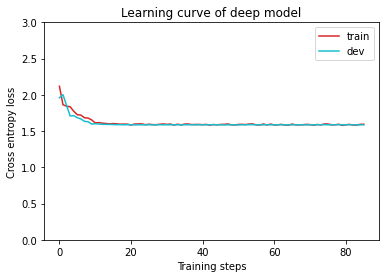

In [ ]:
plot_learning_curve(model_loss_epoch, title='deep model')

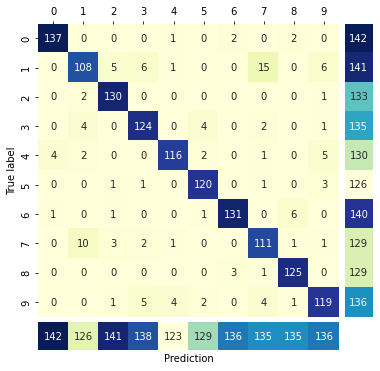

In [ ]:
# see the result of training set
plot_pred(tr_set, model, device)

In [ ]:
# see the result of validation set
preds, labels = test(dv_set, model, device, with_label=True)
print(preds.shape, labels[:3])

(237,) [8 6 6]


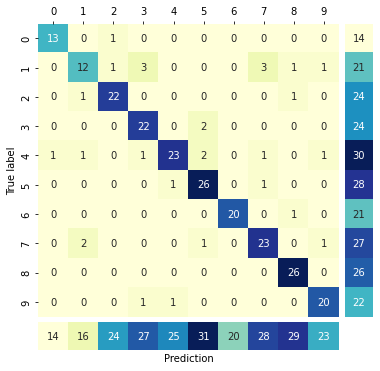

In [ ]:
# preds, labels = test(dv_set, model, device, with_label=True)
plot_pred(dv_set, model, device)

### 3-(b) (5%) 
Please predict the digit No.1579 to No.1593 (data source: MDS_Assignment3_ DRpredict.xlsx) using your best established BPN/CNN model in (a) and fill out the following table.

預測15筆測試資料。  
ref: https://stackoverflow.com/questions/29831489/convert-array-of-indices-to-one-hot-encoded-array-in-numpy

In [ ]:
preds = test(tt_set, model, device)
print('the prediction of hand written digit is:', preds)

the prediction of hand written digit is: [4 0 5 0 5 4 5 0 2 5 7 0 2 5 7]


In [ ]:
submit_matrix = []
start = 1579
for i,v in enumerate(preds):
    submit_matrix.append([start+i, v])
pd.DataFrame(submit_matrix, columns=['No.','Digit Number (0 9) you predict'])

,No.,Digit Number (0 9) you predict
0,1579,4
1,1580,0
2,1581,5
3,1582,0
4,1583,5
5,1584,4
6,1585,5
7,1586,0
8,1587,2
9,1588,5


In [ ]:
onehot_preds = np.zeros((preds.size, preds.max() + 1))
onehot_preds[np.arange(preds.size), preds] = 1
onehot_preds

array([[0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])